In [1]:
# This is my code for the MST688 final project, which will explore a subset of Twitter data attributed to the Russian Internet
# Research Agency. The data was collected by Clemson University researchers - Darren Linvill and Patrick Warren.
# The comprehensive data set contains every tweet sent from each of the 2,752 handles on the list of data Twitter provided to
# Congress in November 2017 since June 19, 2015. In total, the comprehensive data set includes 2,973,371 tweets from 2,848 Twitter
# handles.

# To limit the size of the file for analysis, I only used a subset of the data set, so I downloaded "IRAhandle_tweets_1.csv"
# from https://www.kaggle.com/fivethirtyeight/russian-troll-tweets and trimmed it down by sorting the "followers" column to
# any row with more than 5,000 followers (so that the analysis was on the most viewed tweets).


In [2]:
# First, we need to download the data set (which I conveniently uploaded to my Github to avoid having to
# log into the provider on Kaggle.com)

import pandas

data_url = 'https://raw.githubusercontent.com/mohr110/MST688/main/IRAhandle_tweets_1_subset.csv'

print("Importing data from Github repository...")
IRA_data = pandas.read_csv(data_url, error_bad_lines=False)
print("Data imported!")

Importing data from Github repository...
Data imported!


In [3]:
# Let's take a look at the data set to see the column names
IRA_data.columns

Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date', 'following', 'followers', 'updates',
       'post_type', 'account_type', 'new_june_2018', 'retweet',
       'account_category'],
      dtype='object')

In [4]:
# ...and how the data frame is set up
IRA_data.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,4.301963e+09,BLACKNEWSOUTLET,Adolf Hitler murdered 10M Europeans King Leopo...,United States,English,8/23/2017 01:48,8/23/2017 01:49,30175,40788,2474,NaN,left,0,0,LeftTroll
1,4.301963e+09,BLACKNEWSOUTLET,They won't tell you about these Black inventor...,United States,English,8/23/2017 00:51,8/23/2017 00:51,30175,40781,2473,NaN,left,0,0,LeftTroll
2,4.301963e+09,BLACKNEWSOUTLET,Nontobeko Mbuyazi was called a ghost for being...,United States,English,8/22/2017 21:37,8/22/2017 21:38,30177,40775,2472,NaN,left,0,0,LeftTroll
3,4.301963e+09,BLACKNEWSOUTLET,White trash female calls for the GENOCIDE of B...,United States,English,8/22/2017 03:21,8/22/2017 03:21,30182,40684,2471,NaN,left,0,0,LeftTroll
4,4.301963e+09,BLACKNEWSOUTLET,"""I'm trying to make myself more capable of vio...",United States,English,8/22/2017 02:53,8/22/2017 02:54,30182,40681,2470,NaN,left,0,0,LeftTroll


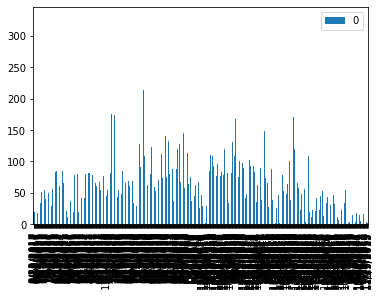

In [5]:
# Let's plot out the range of when these tweets were posted.
# The date column includes the date and the time, but we only want to parse out the date

dateList1 = []
dateList2 = []

dateList1 = IRA_data.publish_date

for item in dateList1:
    date1 = item.split(" ")
    dateList2.append(date1[0])
    
# No we have the dates in a list by themselves as integers, let's plot the dates

from collections import Counter

date_counter = Counter(dateList2)

date_DF = pandas.DataFrame.from_dict(date_counter, orient='index')
date_DF.plot(kind='bar')

In [6]:
# Admittedly, this graph is a cluster

In [7]:
# Let's do some basic statistics to understand more about the scope of the number of followers these troll accounts had...

from statistics import mean

print("The minimum amount of followers is: ", int(min(IRA_data.followers))) # we know this already because I purposely
                                                                            # trimmed the data set to rows with 5,000
                                                                            # followers or more
        
print("The maximum amount of followers is: ", int(max(IRA_data.followers))) # shows the largest amount of followers in this
                                                                            # data subset is 40,788

print("The average amount of followers is: ", round(mean(IRA_data.followers),2)) # the average amount of followers is ~13,578

The minimum amount of followers is:  5000
The maximum amount of followers is:  40788
The average amount of followers is:  13578.09


In [10]:
# We know that the IRA did not just tweet in English, but what other languages did they tweet in?

IRA_data.language.unique() # this shows the amount of languages is fairly large

array(['English', 'Catalan', 'Vietnamese', 'Portuguese', 'Czech',
       'Estonian', 'Spanish', 'Latvian', 'Norwegian', 'Farsi (Persian)',
       'Arabic', 'French', 'Romanian', 'Albanian', 'Lithuanian',
       'Croatian', 'Uzbek', 'Icelandic', 'Italian', 'Dutch', 'Turkish',
       'Finnish', 'Hungarian', 'Danish', 'Polish', 'Swedish',
       'Tagalog (Filipino)', 'Somali', 'Urdu', 'Kurdish', 'German',
       'LANGUAGE UNDEFINED', 'Russian', 'Ukrainian', 'Serbian',
       'Macedonian', 'Bulgarian'], dtype=object)

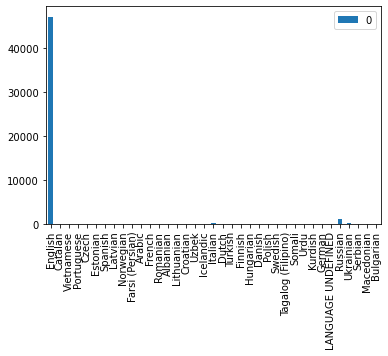

In [11]:
# let's find out the distribution to see what languages were used most

languages = IRA_data.language
languages_counter = Counter(languages)

language_DF = pandas.DataFrame.from_dict(languages_counter, orient='index')
language_DF.plot(kind='bar')

In [12]:
# Now we see 'English' is used by far the most
# With 'English' skewing the scale, it is hard to see the other languag metrics...so let's remove 'English' and plot again

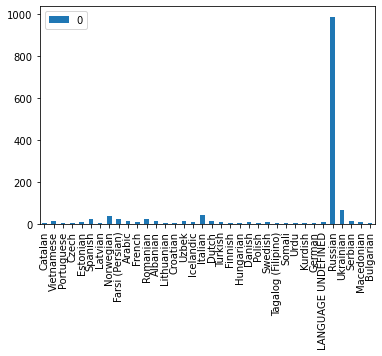

In [13]:
languages_trimmed = []

for item in languages:
    if item != 'English':
        languages_trimmed.append(item)
        
languages_trimmed_counter = Counter(languages_trimmed)

language_trimmed_DF = pandas.DataFrame.from_dict(languages_trimmed_counter, orient='index')
language_trimmed_DF.plot(kind='bar')

In [ ]:
# Now we see that Russian is the next largest language used, with other languages minimally appearing

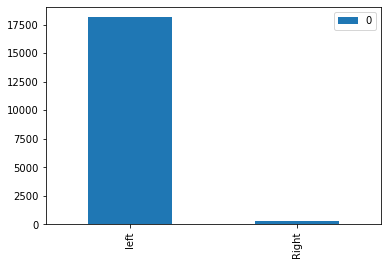

In [21]:
# We know that the IRA posted divisive content from both sides of the political spectrum, Left and Right...
# Let's plot the difference in messaging based on political ideology

ideology = []

for item in IRA_data.account_type:
    if item == 'left':
        ideology.append(item)
    elif item == 'Right':
        ideology.append(item)

ideology_counter = Counter(ideology)

ideology_DF = pandas.DataFrame.from_dict(ideology_counter, orient='index')
ideology_DF.plot(kind='bar')

In [ ]:
# From this subset of data (which remember is just a very minimal subset) - most tweets had a left-ideology focus

In [15]:
# Now let us look at the Tweets themselves and see what insight we can derive by generating a word cloud
# The code in this section was derived from GeeksforGeeks at 'https://www.geeksforgeeks.org/generating-word-cloud-python/'

import numpy
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

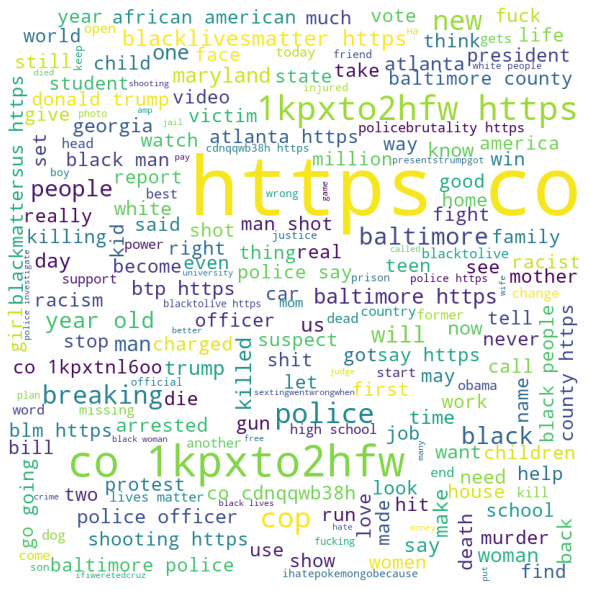

In [16]:
# The code in this section was derived from GeeksforGeeks at 'https://www.geeksforgeeks.org/generating-word-cloud-python/'

comment_words = '' 
stopwords = set(STOPWORDS)
  
# iterate through the data frame
for val in IRA_data.content:      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

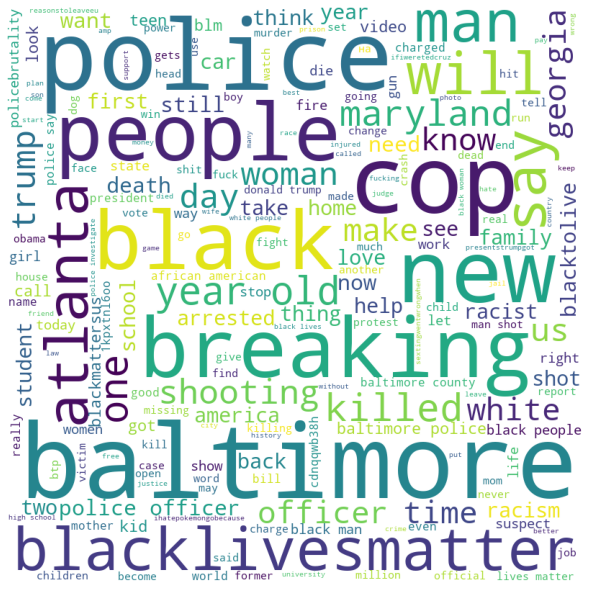

In [17]:
# From the word cloud, we see that there are a lot of random 'words' like "https" and "co" that are being included when they
# don't add much value to the analysis. So we are going to add these 'words' to the word cloud's "stopwords"

stopwords.add("https")
stopwords.add("co")
stopwords.add("http")
stopwords.add("1kpxtnl16oo")
stopwords.add("1kpxto2hfw")

# The code in this section was derived from GeeksforGeeks at 'https://www.geeksforgeeks.org/generating-word-cloud-python/'

comment_words = '' 
  
# iterate through the data frame
for val in IRA_data.content:      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [22]:
# Sentiment analysis: